# Project 5 -- Jacqueline Sanchez

**TA Help:** N/A

- 
    
**Collaboration:** N/A
    
- 
- 

Notes for myself: <br>
Objective: 
- Learning about how to work with missing data and how to take subsets of data. 

### Pre-Practice Examples

In [1]:
# importing libary
library(data.table)

In [2]:
# code here
myDF <- fread("/anvil/projects/tdm/data/olympics/athlete_events.csv")
head(myDF)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


In [3]:
#checking the missing values
table(myDF$Medal, useNA = "always")


Bronze   Gold Silver   <NA> 
 13295  13372  13116 231333 

In [4]:
dim(myDF) #27111615 rows and 15 columns

[1] 271116     15

### Using the `.na` and `subset()` to remove missing values

In [5]:
#another way to missing values are present in our dataframe
dim(myDF)
goodmedalsDF <- subset(myDF, !is.na(Medal))
dim(goodmedalsDF)

[1] 271116     15

[1] 39783    15

In [1]:
head(goodmedalsDF)

ERROR: Error in head(goodmedalsDF): object 'goodmedalsDF' not found


In this example we demostrated that we can use `.na` and `subset()` to remove missing values. 

## Question 1

In [7]:
myDF <- fread("/anvil/projects/tdm/data/death_records/DeathRecords.csv")
head(myDF)

Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,2,1,1,M,1,87,0,...,24,1,1,1,0,0,1,1,100,6
2,1,0,2,1,1,M,1,58,0,...,21,3,3,1,0,0,1,1,100,6
3,1,0,7,1,1,F,1,75,0,...,28,2,2,1,0,0,1,1,100,6
4,1,0,6,1,1,M,1,74,0,...,22,3,3,1,0,0,1,1,100,6
5,1,0,3,1,1,M,1,64,0,...,21,1,1,1,0,0,1,1,100,6
6,1,0,5,1,1,F,1,93,0,...,37,5,5,1,0,0,1,1,100,6


In [8]:
# 1a) Building a subset of the data for which Sex == 'F'
sex_F_DF <- subset(myDF, Sex != 'M')
head(sex_F_DF)

Id,ResidentStatus,Education1989Revision,Education2003Revision,EducationReportingFlag,MonthOfDeath,Sex,AgeType,Age,AgeSubstitutionFlag,...,CauseRecode39,NumberOfEntityAxisConditions,NumberOfRecordAxisConditions,Race,BridgedRaceFlag,RaceImputationFlag,RaceRecode3,RaceRecode5,HispanicOrigin,HispanicOriginRaceRecode
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,1,0,7,1,1,F,1,75,0,...,28,2,2,1,0,0,1,1,100,6
6,1,0,5,1,1,F,1,93,0,...,37,5,5,1,0,0,1,1,100,6
9,1,0,3,1,1,F,1,86,0,...,37,1,1,1,0,0,1,1,100,6
11,1,0,3,1,1,F,1,79,0,...,22,2,2,1,0,0,1,1,100,6
13,1,0,4,1,1,F,1,85,0,...,22,5,5,1,0,0,1,1,100,6
14,1,0,3,1,1,F,1,84,0,...,8,2,2,1,0,0,1,1,100,6


In [9]:
# 1b) Table of the Age values from the subset of female data in 1a
female_data_age <- table(sex_F_DF$Age)
print(female_data_age)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
 3164  2100  1346   937   820   583   495   511   418   472   358   347   386 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  410   499   533   636   735   827   936  1058  1117  1086  1155  1200  1320 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
 1264  1340  1438  1452  1535  1683  1804  1878  2059  1999  2226  2267  2413 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
 2577  2953  3324  3681  4091  4229  4524  4957  5664  6520  7247  8190  8740 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
 9616 10189 11062 11748 12443 12762 13358 13977 14518 15142 15664 16284 17276 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
18813 20865 17669 18584 20486 22755 22041 22074 22656 24026 25305 26091 27780 
   79    80    81    82    83    84    85    86    

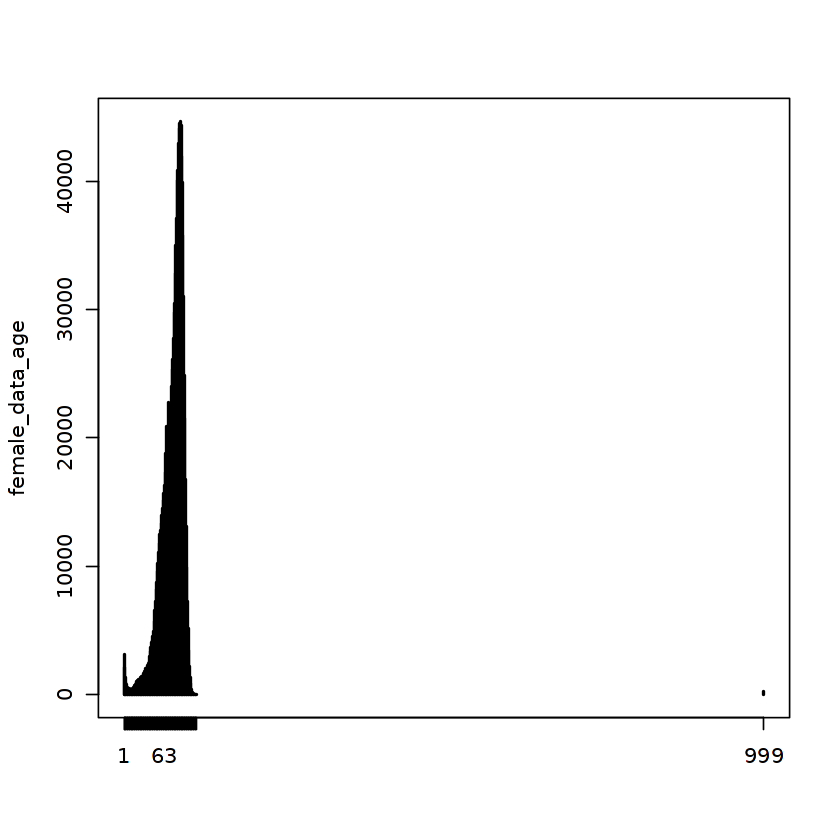

In [10]:
# 1b) plotting the table from the instructions above
plot(female_data_age)

In [10]:
#s<- sum(sex_F_DF$Age == 76)
max_age <- max(sex_F_DF$Age)
print(max_age) # 999 mean that these individuals age could not be determined. 

[1] 999


In [11]:
# # c. building a subset from the original data for which Sex == 'F' & Age != 999
# sexF_age_df <- subset(myDF, (Sex == 'F') & (Age != 999))
# # head(sexF_age_df)
# plot(sexF_age_df) 
### ! Whenever i run this portion it always sends me a message after some time that the kernel or notebook has died? 

##### ! Whenever i run this portion it always sends me a message after some time that the kernel or notebook has died? 

## Question 2

In [12]:
# code here
myDF <- fread("/anvil/projects/tdm/data/8451/The_Complete_Journey_2_Master/5000_transactions.csv")
head(myDF)

BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR
<int>,<int>,<chr>,<int>,<dbl>,<int>,<chr>,<int>,<int>
24,1809,03-JAN-16,5817389,-1.50,-1,SOUTH,1,2016
24,1809,03-JAN-16,5829886,-1.50,-1,SOUTH,1,2016
34,1253,03-JAN-16,539501,2.19,1,EAST,1,2016
60,1595,03-JAN-16,5260099,0.99,1,WEST,1,2016
60,1595,03-JAN-16,4535660,2.50,2,WEST,1,2016
168,3393,03-JAN-16,5602916,4.50,1,SOUTH,1,2016


In [14]:
refundsDF <- subset(myDF, SPEND < 0) # this is to make a subset for all refunds(all whose spend value is negative)
refundsDF_count <- table(refundsDF$STORE_R) # to get the count of each STORE_R instances that have negative spend values
print(refundsDF_count)


CENTRAL    EAST   SOUTH    WEST 
   2750    3269    2675    3952 


## Question 3

In [9]:
# code here
myDF <- fread("/anvil/projects/tdm/data/beer/reviews_sample.csv")
# head(myDF,1)

In [14]:
beers_score <- subset(myDF, (score != 5) & (overall == 5))
dim(beers_score)

[1] 12436    10

3. There are 12436 lines in the data subset of beers whose score is not equal to 5 and have and overall score of 5. 

## Question 4

In [17]:
# code here
library(data.table)
myDF <- fread("/anvil/projects/tdm/data/election/itcont1980.txt", quote="")
names(myDF) <- c("CMTE_ID", "AMNDT_IND", "RPT_TP", "TRANSACTION_PGI", "IMAGE_NUM", "TRANSACTION_TP", "ENTITY_TP", "NAME", "CITY", "STATE", "ZIP_CODE", "EMPLOYER", "OCCUPATION", "TRANSACTION_DT", "TRANSACTION_AMT", "OTHER_ID", "TRAN_ID", "FILE_NUM", "MEMO_CD", "MEMO_TEXT", "SUB_ID")
head(myDF, 2)

CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
<chr>,<chr>,<chr>,<chr>,<int64>,<chr>,<lgl>,<chr>,<chr>,<chr>,...,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<int64>
C00078279,A,M11,P,80031492155,22Y,NA,"MCKENNON, K R",MIDLAND,MI,...,,NA,10031979,400,,NA,NA,NA,CONTRIBUTION REF TO INDIVIDUAL,3062020110011466469
C00078279,A,M11,,79031415137,15,NA,"OREFFICE, P",MIDLAND,MI,...,DOW CHEMICAL CO,NA,10261979,1500,,NA,NA,NA,,3061920110000382948


In [28]:
sixDonations_1980 <- subset(myDF, is.na(TRANSACTION_DT)) 
# head(sixDonations_1980, 40)

In [35]:
# finding out the number instances that these people who have missing donations per person
na_donation_count <- table(sixDonations_1980$NAME)
print(na_donation_count)


      CURCIO, BARBARA G SCHECK, RICHARD HERBERT          WOLFF, GARY W. 
                      1                       6                       2 


4. `RICHARD HERBERT` has 6 instances where his donations are missing in the dataframe

## Question 5

In [36]:
# reading the dataframe
myDF <- fread("/anvil/projects/tdm/data/flights/subset/1990.csv")
head(myDF, 2)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,...,<lgl>,<lgl>,<int>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1990,1,3,3,1707,1630,1755,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA
1990,1,4,4,1706,1630,1807,1723,US,29,...,NA,NA,0,NA,0,NA,NA,NA,NA,NA


In [55]:
# 5a. looking for the departure delays and array delay flight count 
DepDelay_na <- subset(myDF, (is.na(DepDelay)) & (is.na(ArrDelay)))
dim(DepDelay_na)

[1] 52458    29

In [52]:
# 5b. looking for the departure delays is not missing and arrival delay is missing flight count 
ArrDelay_na <- subset(myDF, (!is.na(DepDelay)) & (is.na(ArrDelay)))

# to check the dimensions
dim(ArrDelay_na)

[1] 15954    29

In [54]:
# 5c. find the number of flights for which the ArrDelay is given but the depdelay is missing
ArrDelay_na <- subset(myDF, (is.na(DepDelay)) & (!is.na(ArrDelay)))
dim(DepDelay_na)

[1] 52458    29

a. the number of flights for which the DepDelay is missing and ArrDelay as well is 52458 <br>
b. the number of flights for which the DepDelay is given but the ArrDelay is missing is 15954 <br> 
c. the number of flights for which the ArrDelay is given and DepDelay is not is 52458. 

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.